# Importing Libraries & Data

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/global_Power_plant_database.csv')

# Understanding the Data

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [4]:
df.shape

(908, 25)

In [5]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [25]:
df['latitude'].fillna(df['latitude'].mean(), inplace = True)
df['longitude'].fillna(df['longitude'].mean(), inplace = True)
df['other_fuel1'].fillna(df['other_fuel1'].mode()[0], inplace = True)
df['other_fuel2'].fillna(df['other_fuel2'].mode()[0], inplace = True)
df['commissioning_year'].fillna(df['commissioning_year'].mean(), inplace = True)
df['owner'].fillna(df['owner'].mode()[0], inplace = True)
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace = True)
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mean(), inplace = True)
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean(), inplace = True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(), inplace = True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(), inplace = True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(), inplace = True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(), inplace = True)
df['generation_data_source'].fillna(df['generation_data_source'].mode()[0], inplace = True)

In [26]:
df = df.drop(columns = ['other_fuel3', 'wepp_id', 'estimated_generation_gwh'], axis = 1) #as the column has only null values

In [32]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
other_fuel2               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

In [27]:
df.nunique()

country                     1
country_long                1
name                      908
gppd_idnr                 908
capacity_mw               365
latitude                  838
longitude                 829
primary_fuel                8
other_fuel1                 3
other_fuel2                 1
commissioning_year         74
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2013       365
generation_gwh_2014       375
generation_gwh_2015       399
generation_gwh_2016       406
generation_gwh_2017       411
generation_data_source      1
dtype: int64

In [28]:
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [29]:
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
645.0      1
41.4       1
17.5       1
445.0      1
106.6      1
Name: capacity_mw, Length: 365, dtype: int64

In [30]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.0,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.088110,4.781201,12.994825,0.0,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1996.876894,2018.0,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,21.278850,76.978950,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,25.183775,79.211600,2003.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


# Understanding Features

<Axes: xlabel='primary_fuel', ylabel='count'>

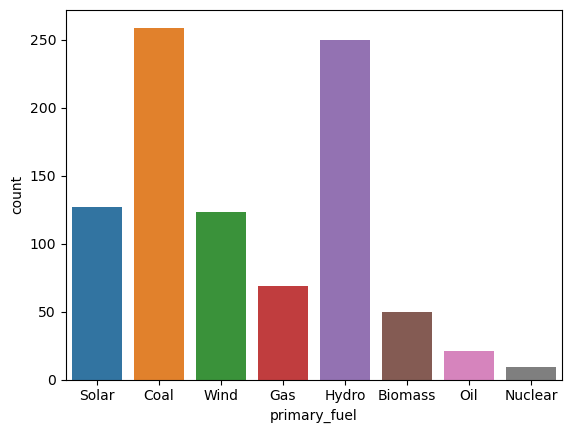

In [31]:
sns.countplot(x='primary_fuel', data = df)

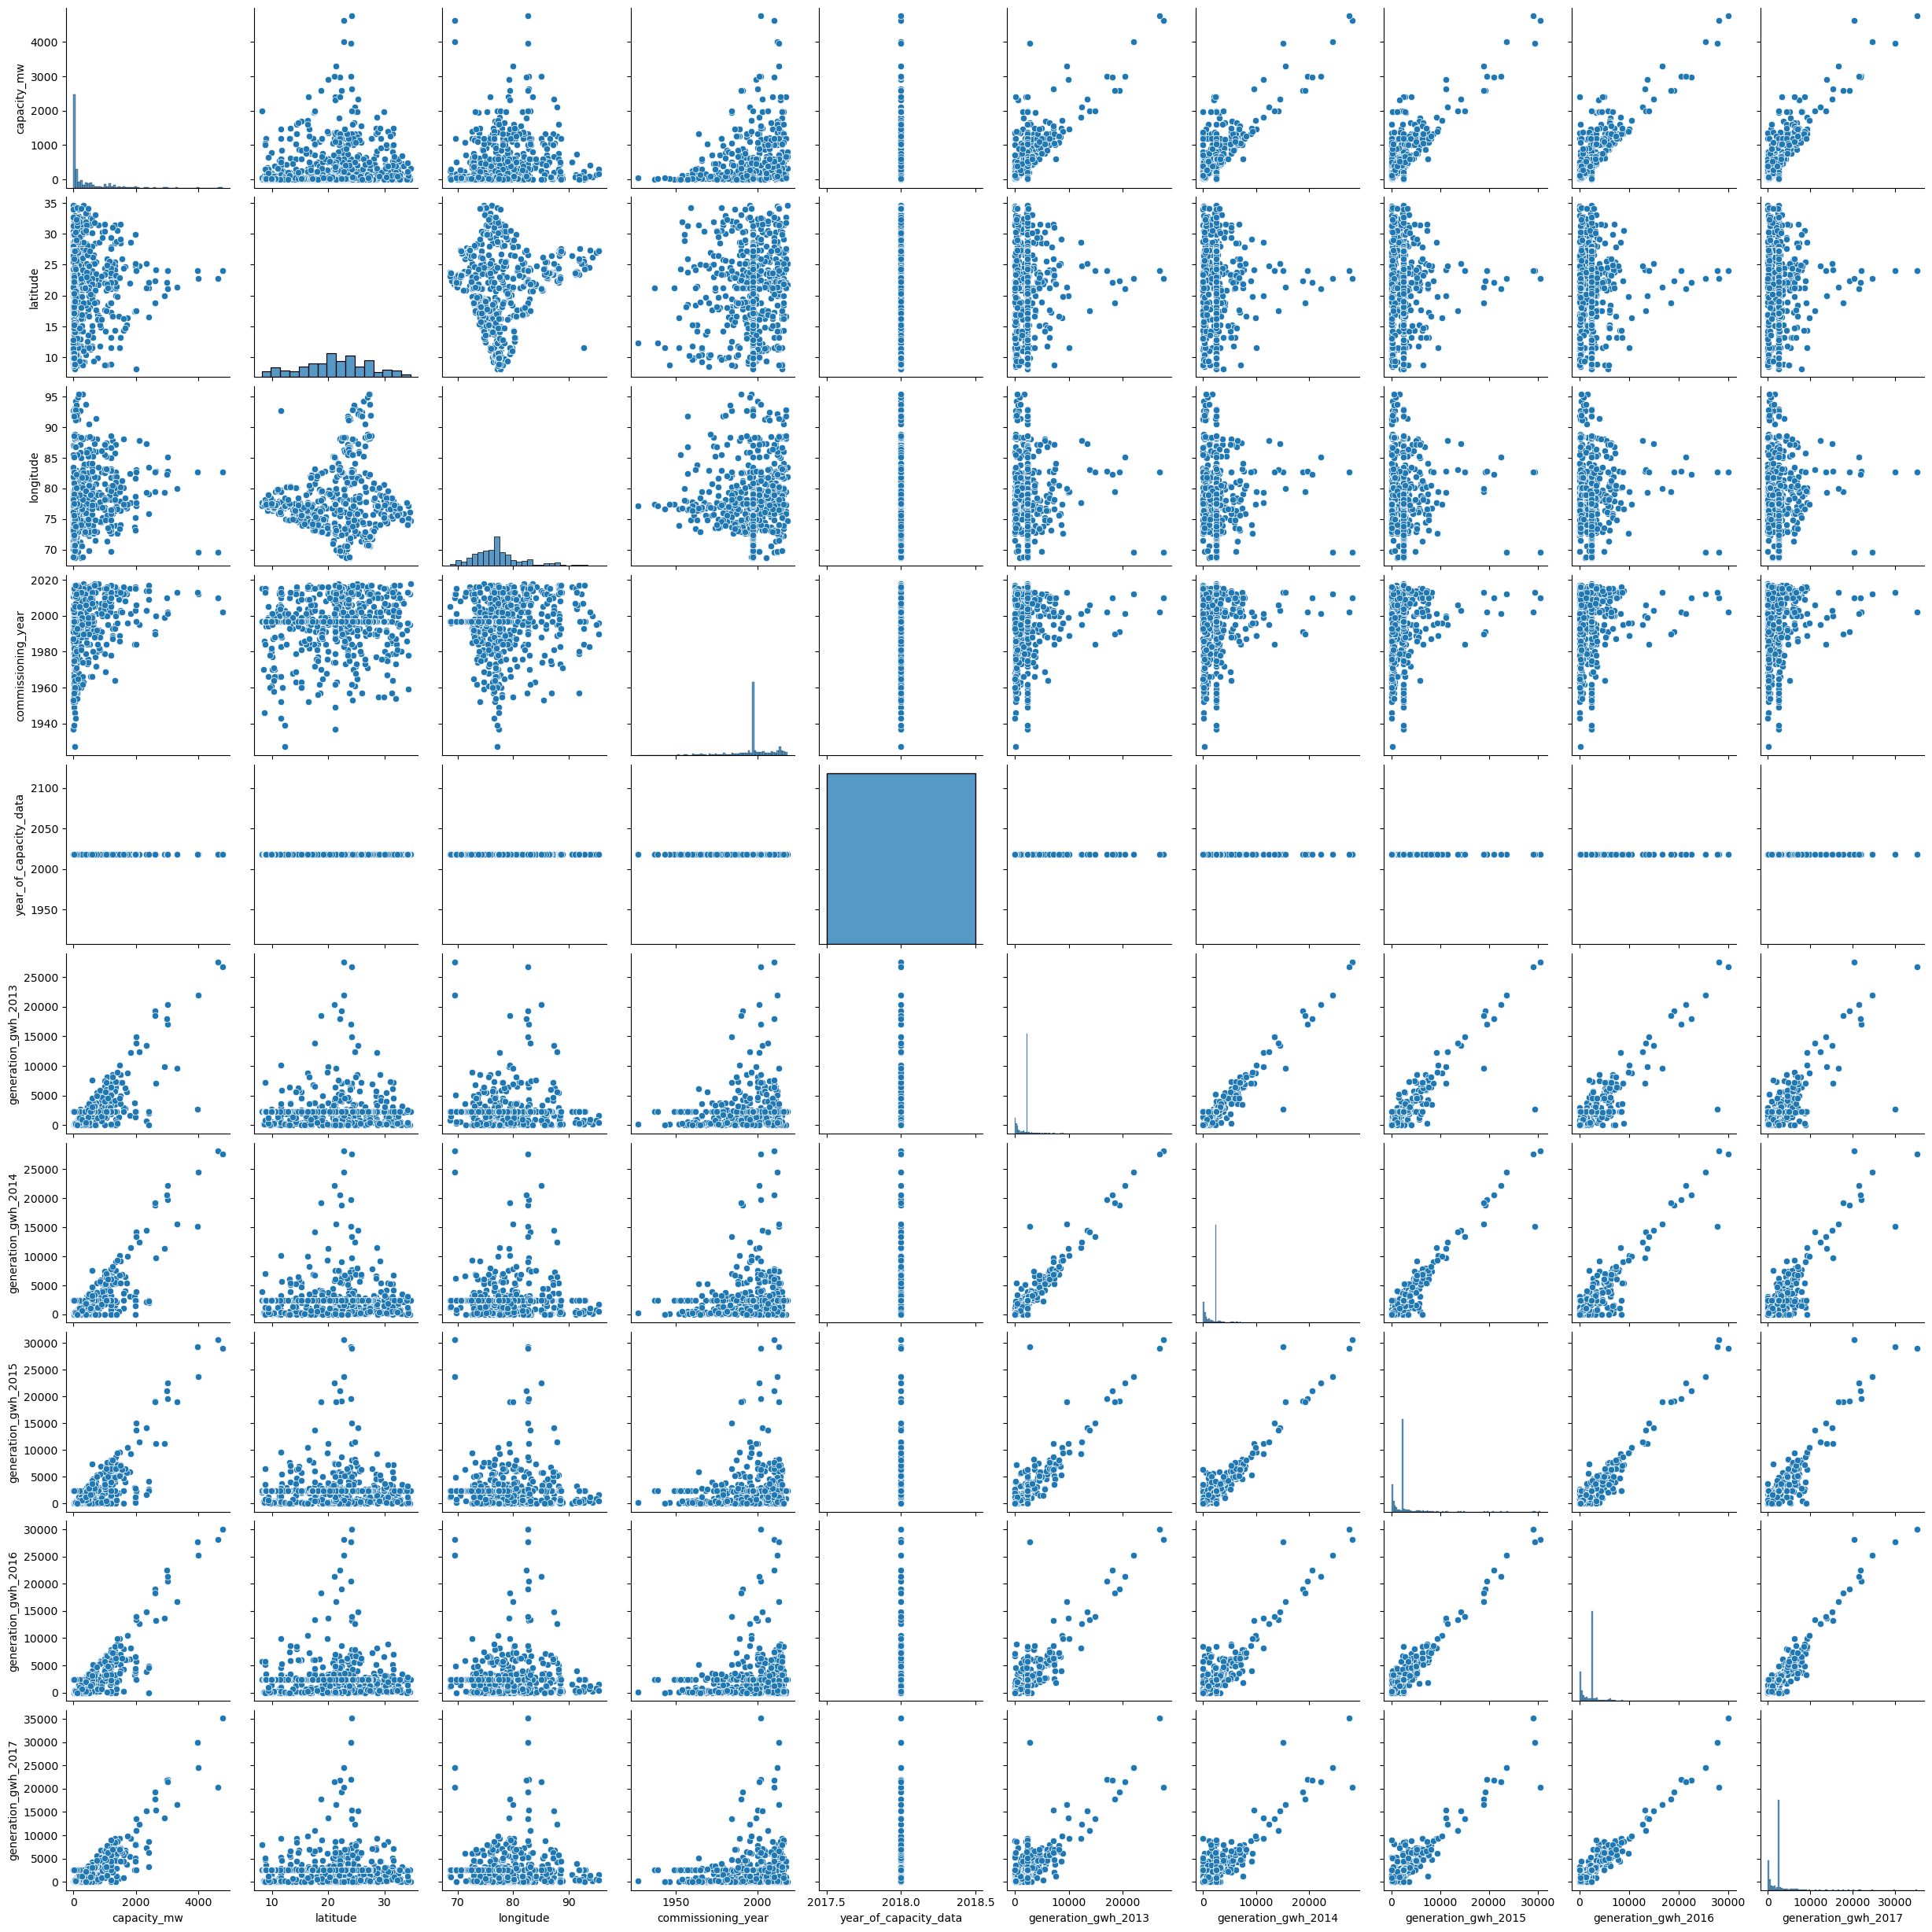

In [33]:
sns.pairplot(df, palette="colorblind")
plt.show()

# Encoding object data to Integer data

In [34]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0.0,0.0,0.0,658.0,2.5,28.1839,73.2407,6.0,2.0,0.0,...,109.0,128.0,1.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
1,0.0,0.0,1.0,520.0,98.0,24.7663,74.6090,1.0,2.0,0.0,...,174.0,173.0,2.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
2,0.0,0.0,2.0,854.0,39.2,21.9038,69.3732,7.0,2.0,0.0,...,21.0,205.0,2.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
3,0.0,0.0,3.0,0.0,135.0,23.8712,91.3602,2.0,2.0,0.0,...,22.0,58.0,2.0,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0.0
4,0.0,0.0,4.0,1.0,1800.0,21.9603,82.4091,1.0,2.0,0.0,...,22.0,58.0,2.0,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0.0,0.0,903.0,494.0,1600.0,16.2949,77.3568,1.0,2.0,0.0,...,22.0,58.0,2.0,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000,0.0
904,0.0,0.0,904.0,823.0,3.0,12.8932,78.1654,6.0,2.0,0.0,...,77.0,22.0,0.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
905,0.0,0.0,905.0,892.0,25.5,15.2758,75.5811,7.0,2.0,0.0,...,21.0,260.0,2.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
906,0.0,0.0,906.0,540.0,80.0,24.3500,73.7477,1.0,2.0,0.0,...,59.0,82.0,2.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0


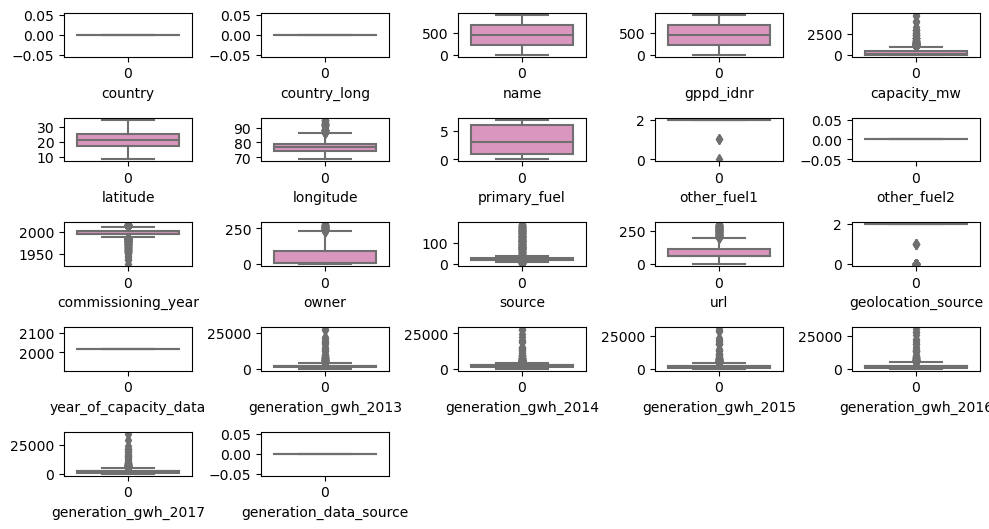

In [38]:
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for c in df.columns:
    if plotnumber <= 22:
        x=plt.subplot(6,5,plotnumber)
        sns.boxplot(df[c], palette = "Set2_r")
        plt.xlabel(c, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

# Correlation Check

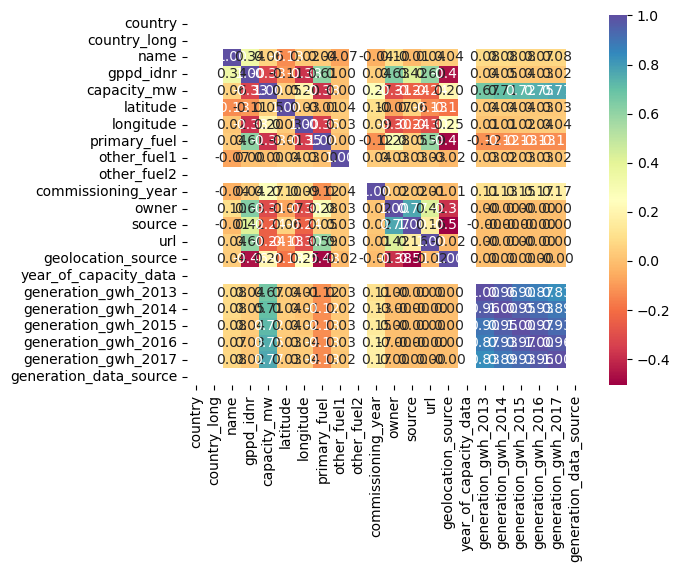

In [41]:
corr = df.corr()
sns.heatmap(corr,annot=True,fmt='0.2f',cmap='Spectral')
plt.show()

In [42]:
corr['primary_fuel'].sort_values(ascending = False)

primary_fuel              1.000000
gppd_idnr                 0.607373
url                       0.589348
owner                     0.284055
source                    0.053609
name                      0.038752
other_fuel1               0.004902
latitude                 -0.013453
generation_gwh_2013      -0.120512
commissioning_year       -0.123060
generation_gwh_2014      -0.125000
generation_gwh_2015      -0.125138
generation_gwh_2016      -0.131358
generation_gwh_2017      -0.132174
longitude                -0.348710
capacity_mw              -0.377783
geolocation_source       -0.482803
country                        NaN
country_long                   NaN
other_fuel2                    NaN
year_of_capacity_data          NaN
generation_data_source         NaN
Name: primary_fuel, dtype: float64

In [43]:
corr['capacity_mw'].sort_values(ascending = False)

capacity_mw               1.000000
generation_gwh_2017       0.767040
generation_gwh_2016       0.752829
generation_gwh_2015       0.722081
generation_gwh_2014       0.705434
generation_gwh_2013       0.667842
commissioning_year        0.265827
geolocation_source        0.204698
longitude                 0.197124
name                      0.059870
latitude                  0.049790
other_fuel1               0.002672
source                   -0.241701
url                      -0.243176
owner                    -0.310560
gppd_idnr                -0.334308
primary_fuel             -0.377783
country                        NaN
country_long                   NaN
other_fuel2                    NaN
year_of_capacity_data          NaN
generation_data_source         NaN
Name: capacity_mw, dtype: float64

In [44]:
df = df.drop(columns = ['country', 'country_long', 'other_fuel2', 'year_of_capacity_data', 'generation_data_source', 'other_fuel1'], axis = 1)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 908 non-null    float64
 1   gppd_idnr            908 non-null    float64
 2   capacity_mw          908 non-null    float64
 3   latitude             908 non-null    float64
 4   longitude            908 non-null    float64
 5   primary_fuel         908 non-null    float64
 6   commissioning_year   908 non-null    float64
 7   owner                908 non-null    float64
 8   source               908 non-null    float64
 9   url                  908 non-null    float64
 10  geolocation_source   908 non-null    float64
 11  generation_gwh_2013  908 non-null    float64
 12  generation_gwh_2014  908 non-null    float64
 13  generation_gwh_2015  908 non-null    float64
 14  generation_gwh_2016  908 non-null    float64
 15  generation_gwh_2017  908 non-null    flo

# Skewness Check

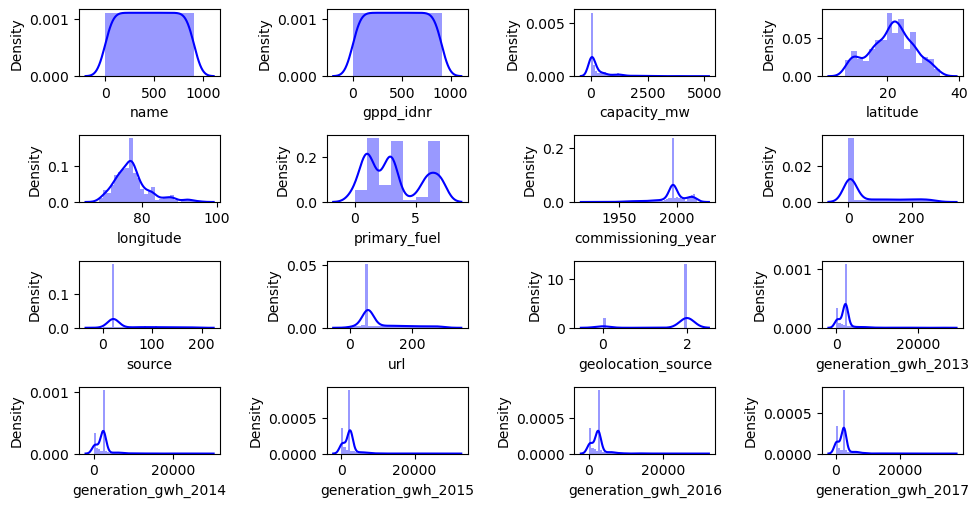

In [53]:
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for c in df.columns:
    if plotnumber <= 16:
        x=plt.subplot(5,4,plotnumber)
        sns.distplot(df[c],color = "b")
        plt.xlabel(c, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [54]:
skew = df.skew()
skew

name                   0.000000
gppd_idnr              0.000000
capacity_mw            3.193257
latitude              -0.147391
longitude              1.129836
primary_fuel           0.471141
commissioning_year    -1.383330
owner                  1.366078
source                 1.829145
url                    1.512258
geolocation_source    -2.161710
generation_gwh_2013    5.241491
generation_gwh_2014    5.041961
generation_gwh_2015    5.367370
generation_gwh_2016    5.071758
generation_gwh_2017    5.111938
dtype: float64

In [55]:
for i,score in skew.iteritems():
    if score > 0.5 or score < -0.5:
        df[i] = np.cbrt(df[i])
df.skew()

name                   0.000000
gppd_idnr              0.000000
capacity_mw            1.006476
latitude              -0.147391
longitude              0.990398
primary_fuel           0.471141
commissioning_year    -1.406640
owner                  0.928794
source                 1.325211
url                    0.616959
geolocation_source    -2.183888
generation_gwh_2013   -0.324073
generation_gwh_2014   -0.357695
generation_gwh_2015   -0.263571
generation_gwh_2016   -0.273079
generation_gwh_2017   -0.323046
dtype: float64

In [56]:
for i,score in skew.iteritems():
    if score > 0.5 or score < -0.5:
        df[i] = np.cbrt(df[i])
df.skew()

name                   0.000000
gppd_idnr              0.000000
capacity_mw            0.267240
latitude              -0.147391
longitude              0.944444
primary_fuel           0.471141
commissioning_year    -1.414441
owner                  0.638528
source                -0.418653
url                   -1.906044
geolocation_source    -2.189291
generation_gwh_2013   -3.332136
generation_gwh_2014   -3.139560
generation_gwh_2015   -2.870987
generation_gwh_2016   -2.841547
generation_gwh_2017   -2.808421
dtype: float64

# Assign feature and target data

In [57]:
x_class = df.drop('primary_fuel', axis =1)#for classification
y_class = df['primary_fuel']#for classification
x_reg = df.drop('capacity_mw', axis =1)#for regression
y_reg = df['capacity_mw']#for regression

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x_reg), columns = x_reg.columns)
x

,name,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-1.730144,0.780186,1.148396,-0.899079,1.225418,1.082507,1.718686,1.569645,0.712655,0.169719,0.324003,0.336278,0.360074,0.363272,0.363800
1,-1.726329,0.253704,0.586730,-0.592775,-0.967486,0.002896,1.811689,2.223991,1.146531,0.389433,0.324003,0.336278,0.360074,0.363272,0.363800
2,-1.722514,1.527944,0.116292,-1.793207,1.663998,0.002896,-1.136703,-0.481611,1.397432,0.389433,0.324003,0.336278,0.360074,0.363272,0.363800
3,-1.718699,-1.730144,0.439625,2.800523,-0.528905,0.548252,-0.695360,-0.428669,-0.360527,0.389433,-0.407701,-0.359951,-0.170946,-0.138683,-0.269764
4,-1.714884,-1.726329,0.125578,1.063512,-0.967486,1.387054,-0.695360,-0.428669,-0.360527,0.389433,0.131451,0.462301,0.864559,0.876036,0.764830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1.714884,0.154511,-0.805503,0.007549,-0.967486,1.463106,-0.695360,-0.428669,-0.360527,0.389433,0.324003,0.336278,-2.430801,-0.715316,-0.151605
904,1.718699,1.409677,-1.364556,0.180598,1.225418,0.002896,1.198640,1.104969,-1.552482,-2.574655,0.324003,0.336278,0.360074,0.363272,0.363800
905,1.722514,1.672918,-0.972987,-0.378182,1.663998,0.002896,-0.695360,-0.481611,1.756838,0.389433,0.324003,0.336278,0.360074,0.363272,0.363800
906,1.726329,0.330005,0.518313,-0.784994,-0.967486,0.002896,1.039069,0.760905,0.097340,0.389433,0.324003,0.336278,0.360074,0.363272,0.363800


In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.441320,name
1,4.833412,gppd_idnr
2,1.127650,latitude
3,1.264948,longitude
4,2.925198,primary_fuel
5,1.096910,commissioning_year
6,4.831723,owner
7,3.219955,source
8,1.764708,url
9,2.274211,geolocation_source


In [ ]:
Model Creation for Regression

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [62]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y_reg,test_size=0.3, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print(maxAccu," at ",maxRS)

0.6139794038912894  at  157


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y_reg, test_size = 0.30, random_state = maxRS)

In [64]:
lr = LinearRegression()
lr.fit(x_train,y_train)
plr = lr.predict(x_test)
ptrain = lr.predict(x_train)
print(lr)
print('r2_score :',r2_score(y_test,plr))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_squared_error :',mean_squared_error(y_test,plr))
print('mean_absolute_error :',mean_absolute_error(y_test,plr))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,plr)))

LinearRegression()
r2_score : 0.6139794038912894
r2_score on train data : 49.88593555870413
mean_squared_error : 0.04704114350622224
mean_absolute_error : 0.17075204260750443
root mean squared error : 0.21688970355049647


In [65]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
prfr = rfr.predict(x_test)
ptrain = rfr.predict(x_train)
print(rfr)
print('r2_score :',r2_score(y_test,prfr))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,prfr))
print('mean_squared_error :',mean_squared_error(y_test,prfr))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,prfr)))

RandomForestRegressor()
r2_score : 0.8512333887869191
r2_score on train data : 97.29754099017765
mean_absolute_error : 0.09311428175107925
mean_squared_error : 0.018128958862697827
root mean squared error : 0.13464382222255067


In [66]:
knn = KNN()
knn.fit(x_train,y_train)
pknn = knn.predict(x_test)
ptrain = knn.predict(x_train)
print(knn)
print('r2_score :',r2_score(y_test,pknn))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,pknn))
print('mean_squared_error :',mean_squared_error(y_test,pknn))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pknn)))

KNeighborsRegressor()
r2_score : 0.7192062184408692
r2_score on train data : 76.237549246624
mean_absolute_error : 0.13665989095487474
mean_squared_error : 0.034218020248479246
root mean squared error : 0.18498113484482478


In [67]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pgbr = gbr.predict(x_test)
ptrain = gbr.predict(x_train)
print(gbr)
print('r2_score :',r2_score(y_test,pgbr))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,pgbr))
print('mean_squared_error :',mean_squared_error(y_test,pgbr))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pgbr)))

GradientBoostingRegressor()
r2_score : 0.8325741553503927
r2_score on train data : 92.10633473180113
mean_absolute_error : 0.10249107077431964
mean_squared_error : 0.020402805612461796
root mean squared error : 0.1428383898413231


In [68]:
lasso = Lasso()
lasso.fit(x_train,y_train)
plasso = lasso.predict(x_test)
ptrain = lasso.predict(x_train)
print(lasso)
print('r2_score :',r2_score(y_test,plasso))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,plasso))
print('mean_squared_error :',mean_squared_error(y_test,plasso))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,plasso)))

Lasso()
r2_score : -0.0004007149576901181
r2_score on train data : 0.0
mean_absolute_error : 0.29898093582087193
mean_squared_error : 0.12191057697553279
root mean squared error : 0.34915695177889955


In [69]:
ridge = Ridge()
ridge.fit(x_train,y_train)
pridge = ridge.predict(x_test)
ptrain = ridge.predict(x_train)
print(ridge)
print('r2_score :',r2_score(y_test,pridge))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,pridge))
print('mean_squared_error :',mean_squared_error(y_test,pridge))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pridge)))

Ridge()
r2_score : 0.6140218574764478
r2_score on train data : 49.88581338088321
mean_absolute_error : 0.17076066970756199
mean_squared_error : 0.0470359700382469
root mean squared error : 0.2168777767274621


In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
score = cross_val_score(lr,x,y_reg,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,plr)-score.mean())*100)

[0.51325939 0.58143367 0.52520446 0.52713828 0.44665679]
0.5187385195339329
Diff b/w R2 and cross val score is : 9.524088435735646


In [72]:
score = cross_val_score(rfr,x,y_reg,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,prfr)-score.mean())*100)

[0.78972943 0.81657539 0.79838722 0.85338417 0.77448971]
0.8065131865501913
Diff b/w R2 and cross val score is : 4.472020223672779


In [73]:
score = cross_val_score(knn,x,y_reg,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,pknn)-score.mean())*100)

[0.60927948 0.63519846 0.6486074  0.63999918 0.61245662]
0.6291082288220421
Diff b/w R2 and cross val score is : 9.009798961882709


In [74]:
score = cross_val_score(gbr,x,y_reg,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,pgbr)-score.mean())*100)

[0.75161683 0.81564331 0.8133689  0.84175219 0.79604819]
0.8036858830316806
Diff b/w R2 and cross val score is : 2.888827231871205


In [75]:
score = cross_val_score(lasso,x,y_reg,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,plasso)-score.mean())*100)

[-0.00060406 -0.00099221 -0.00022144 -0.01353726 -0.00519481]
-0.004109954913352487
Diff b/w R2 and cross val score is : 0.3709239955662369


In [76]:
score = cross_val_score(ridge,x,y_reg,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,pridge)-score.mean())*100)

[0.5135532  0.58158741 0.52514343 0.52713308 0.44690847]
0.5188651158034273
Diff b/w R2 and cross val score is : 9.515674167302047


GradientBoostingRegressor is used as the final model as it has the best performance

In [77]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 5, 7],}

In [78]:
gscv = GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

In [79]:
gscv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

# Final Model for Regression

In [80]:
Model = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50)
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
print('r2_score :',r2_score(y_test,pred))
print('mean_absolute_error :',mean_absolute_error(y_test,pred))
print('mean_squared_error :',mean_squared_error(y_test,pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

r2_score : 0.8311172116906775
mean_absolute_error : 0.10439386861680806
mean_squared_error : 0.02058035130942207
root mean squared error : 0.1434585351571041


In [81]:
import pickle
filename = 'capacity_mw.pkl'
pickle.dump(Model,open(filename,'wb'))

In [82]:
load_model = pickle.load(open('capacity_mw.pkl','rb'))
result = load_model.score(x_test,y_test)
print(result*100)

83.11172116906775


# Model Creation for Classification

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x_class), columns = x_class.columns)
x

,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-1.730144,0.780186,-1.483937,1.148396,-0.899079,1.082507,1.718686,1.569645,0.712655,0.169719,0.324003,0.336278,0.360074,0.363272,0.363800
1,-1.726329,0.253704,0.074532,0.586730,-0.592775,0.002896,1.811689,2.223991,1.146531,0.389433,0.324003,0.336278,0.360074,0.363272,0.363800
2,-1.722514,1.527944,-0.376093,0.116292,-1.793207,0.002896,-1.136703,-0.481611,1.397432,0.389433,0.324003,0.336278,0.360074,0.363272,0.363800
3,-1.718699,-1.730144,0.243195,0.439625,2.800523,0.548252,-0.695360,-0.428669,-0.360527,0.389433,-0.407701,-0.359951,-0.170946,-0.138683,-0.269764
4,-1.714884,-1.726329,1.851977,0.125578,1.063512,1.387054,-0.695360,-0.428669,-0.360527,0.389433,0.131451,0.462301,0.864559,0.876036,0.764830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1.714884,0.154511,1.768341,-0.805503,0.007549,1.463106,-0.695360,-0.428669,-0.360527,0.389433,0.324003,0.336278,-2.430801,-0.715316,-0.151605
904,1.718699,1.409677,-1.420562,-1.364556,0.180598,0.002896,1.198640,1.104969,-1.552482,-2.574655,0.324003,0.336278,0.360074,0.363272,0.363800
905,1.722514,1.672918,-0.572257,-0.972987,-0.378182,0.002896,-0.695360,-0.481611,1.756838,0.389433,0.324003,0.336278,0.360074,0.363272,0.363800
906,1.726329,0.330005,-0.029265,0.518313,-0.784994,0.002896,1.039069,0.760905,0.097340,0.389433,0.324003,0.336278,0.360074,0.363272,0.363800


In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.459114,name
1,4.566912,gppd_idnr
2,2.068263,capacity_mw
3,1.127576,latitude
4,1.252488,longitude
5,1.207954,commissioning_year
6,4.933576,owner
7,2.903326,source
8,1.416591,url
9,1.830496,geolocation_source


In [85]:
y_class.value_counts()

1.0    259
3.0    250
6.0    127
7.0    123
2.0     69
0.0     50
5.0     21
4.0      9
Name: primary_fuel, dtype: int64

In [86]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x_class, y_class)

In [87]:
y1.value_counts()

6.0    259
1.0    259
7.0    259
2.0    259
3.0    259
0.0    259
5.0    259
4.0    259
Name: primary_fuel, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRS = 0
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
RFR = RandomForestClassifier()
RFR.fit(x_train,y_train)
pred = RFR.predict(x_test)
acc = accuracy_score(y_test,pred)
if acc>maxAccu:
    maxAccu = acc
    maxRS = i

print(maxAccu," at ",maxRS)

0.9228295819935691  at  199


In [89]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = maxRS)

In [90]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [91]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
prfc = RFC.predict(x_test)
print(accuracy_score(y_test,prfc))
print(confusion_matrix(y_test,prfc))
print(classification_report(y_test,prfc))

0.9244372990353698
[[76  0  0  0  0  1  0  0]
 [ 5 52  4  4  6  3  0  0]
 [ 0  1 66  2  0  3  0  0]
 [ 0  6  6 54  2  1  0  0]
 [ 0  0  0  0 78  0  0  1]
 [ 0  0  1  1  0 73  0  0]
 [ 0  0  0  0  0  0 91  0]
 [ 0  0  0  0  0  0  0 85]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        77
         1.0       0.88      0.70      0.78        74
         2.0       0.86      0.92      0.89        72
         3.0       0.89      0.78      0.83        69
         4.0       0.91      0.99      0.95        79
         5.0       0.90      0.97      0.94        75
         6.0       1.00      1.00      1.00        91
         7.0       0.99      1.00      0.99        85

    accuracy                           0.92       622
   macro avg       0.92      0.92      0.92       622
weighted avg       0.92      0.92      0.92       622



In [92]:
svc = SVC()
svc.fit(x_train,y_train)
psvc = svc.predict(x_test)
print(accuracy_score(y_test,psvc))
print(confusion_matrix(y_test,psvc))
print(classification_report(y_test,psvc))

0.4983922829581994
[[77  0  0  0  0  0  0  0]
 [19  1  7 23 24  0  0  0]
 [11  0 12 20 29  0  0  0]
 [ 2  0  5 30 32  0  0  0]
 [ 3  0  5  6 61  0  1  3]
 [29  3  3 22 18  0  0  0]
 [ 1  0  0  0  0  0 76 14]
 [15  0  0  0  0  0 17 53]]
              precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        77
         1.0       0.25      0.01      0.03        74
         2.0       0.38      0.17      0.23        72
         3.0       0.30      0.43      0.35        69
         4.0       0.37      0.77      0.50        79
         5.0       0.00      0.00      0.00        75
         6.0       0.81      0.84      0.82        91
         7.0       0.76      0.62      0.68        85

    accuracy                           0.50       622
   macro avg       0.42      0.48      0.41       622
weighted avg       0.44      0.50      0.43       622



In [93]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
pgb = GB.predict(x_test)
print(accuracy_score(y_test,pgb))
print(confusion_matrix(y_test,pgb))
print(classification_report(y_test,pgb))

0.9131832797427653
[[76  1  0  0  0  0  0  0]
 [ 5 55  2  4  6  2  0  0]
 [ 1  6 56  3  1  4  0  1]
 [ 0  4  7 55  2  1  0  0]
 [ 0  0  1  0 78  0  0  0]
 [ 0  0  1  1  0 73  0  0]
 [ 0  1  0  0  0  0 90  0]
 [ 0  0  0  0  0  0  0 85]]
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        77
         1.0       0.82      0.74      0.78        74
         2.0       0.84      0.78      0.81        72
         3.0       0.87      0.80      0.83        69
         4.0       0.90      0.99      0.94        79
         5.0       0.91      0.97      0.94        75
         6.0       1.00      0.99      0.99        91
         7.0       0.99      1.00      0.99        85

    accuracy                           0.91       622
   macro avg       0.91      0.91      0.91       622
weighted avg       0.91      0.91      0.91       622



In [94]:
AB = AdaBoostClassifier()
AB.fit(x_train,y_train)
pab = AB.predict(x_test)
print(accuracy_score(y_test,pab))
print(confusion_matrix(y_test,pab))
print(classification_report(y_test,pab))

0.5627009646302251
[[ 0  2 75  0  0  0  0  0]
 [ 0  3 36  2 33  0  0  0]
 [ 0  1 70  0  1  0  0  0]
 [ 0  0 42 24  3  0  0  0]
 [ 0  0  0  1 78  0  0  0]
 [ 0  1 68  6  0  0  0  0]
 [ 0  0  0  0  1  0 90  0]
 [ 0  0  0  0  0  0  0 85]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        77
         1.0       0.43      0.04      0.07        74
         2.0       0.24      0.97      0.39        72
         3.0       0.73      0.35      0.47        69
         4.0       0.67      0.99      0.80        79
         5.0       0.00      0.00      0.00        75
         6.0       1.00      0.99      0.99        91
         7.0       1.00      1.00      1.00        85

    accuracy                           0.56       622
   macro avg       0.51      0.54      0.47       622
weighted avg       0.53      0.56      0.49       622



In [95]:
B = BaggingClassifier()
B.fit(x_train,y_train)
pb = B.predict(x_test)
print(accuracy_score(y_test,pb))
print(confusion_matrix(y_test,pb))
print(classification_report(y_test,pb))

0.9035369774919614
[[76  0  0  0  0  1  0  0]
 [ 4 51  3  3  8  5  0  0]
 [ 1  5 59  2  0  5  0  0]
 [ 0  3  9 53  2  2  0  0]
 [ 0  1  0  0 78  0  0  0]
 [ 0  1  3  2  0 69  0  0]
 [ 0  0  0  0  0  0 91  0]
 [ 0  0  0  0  0  0  0 85]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        77
         1.0       0.84      0.69      0.76        74
         2.0       0.80      0.82      0.81        72
         3.0       0.88      0.77      0.82        69
         4.0       0.89      0.99      0.93        79
         5.0       0.84      0.92      0.88        75
         6.0       1.00      1.00      1.00        91
         7.0       1.00      1.00      1.00        85

    accuracy                           0.90       622
   macro avg       0.90      0.90      0.90       622
weighted avg       0.90      0.90      0.90       622



In [96]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
pet = ET.predict(x_test)
print(accuracy_score(y_test,pet))
print(confusion_matrix(y_test,pet))
print(classification_report(y_test,pet))

0.9405144694533762
[[77  0  0  0  0  0  0  0]
 [ 7 52  4  5  2  4  0  0]
 [ 0  1 68  2  0  1  0  0]
 [ 0  4  5 59  0  1  0  0]
 [ 0  0  0  0 79  0  0  0]
 [ 0  0  0  1  0 74  0  0]
 [ 0  0  0  0  0  0 91  0]
 [ 0  0  0  0  0  0  0 85]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        77
         1.0       0.91      0.70      0.79        74
         2.0       0.88      0.94      0.91        72
         3.0       0.88      0.86      0.87        69
         4.0       0.98      1.00      0.99        79
         5.0       0.93      0.99      0.95        75
         6.0       1.00      1.00      1.00        91
         7.0       1.00      1.00      1.00        85

    accuracy                           0.94       622
   macro avg       0.94      0.94      0.93       622
weighted avg       0.94      0.94      0.94       622



In [97]:
score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,prfc) - score.mean())

[0.87951807 0.88674699 0.94927536 0.92028986 0.92028986]
0.9112240265409464
Diff b/w Acc score and cross val score : 0.01321327249442339


In [100]:
score = cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,psvc) - score.mean())

[0.40963855 0.44337349 0.39371981 0.43478261 0.40821256]
0.4179454048076363
Diff b/w Acc score and cross val score : 0.08044687815056306


In [99]:
score = cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pgb) - score.mean())

[0.86746988 0.86024096 0.93478261 0.91304348 0.86956522]
0.889020429544264
Diff b/w Acc score and cross val score : 0.024162850198501284


In [101]:
score = cross_val_score(AB,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pab) - score.mean())

[0.3686747  0.48192771 0.56280193 0.53623188 0.46859903]
0.48364705197602004
Diff b/w Acc score and cross val score : 0.07905391265420508


In [102]:
score = cross_val_score(B,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pb) - score.mean())

[0.85060241 0.87710843 0.92028986 0.92995169 0.90821256]
0.8972329899307375
Diff b/w Acc score and cross val score : 0.006303987561223856


In [103]:
score = cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pet) - score.mean())

[0.87710843 0.9060241  0.94202899 0.92270531 0.90096618]
0.9097666026424538
Diff b/w Acc score and cross val score : 0.030747866810922453


RandomForestClassifier is used as the final model as it has the best performance

In [104]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [25, 50, 100, 150], 
              'max_features': ['sqrt', 'log2', None], 
              'max_depth': [3, 6, 9], 
              'max_leaf_nodes': [3, 6, 9], }

In [105]:
GVC = GridSearchCV(RandomForestClassifier(), parameters, cv = 5)
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [106]:
GVC.best_params_

{'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': 9,
 'n_estimators': 150}

# Final Model for Classification

In [107]:
Final_model = RandomForestClassifier(max_depth = 9, max_features = None, max_leaf_nodes = 9, n_estimators = 150)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

78.61736334405145


In [108]:
import joblib
joblib.dump(Final_model,"primary_fuel.pkl")

['primary_fuel.pkl']

In [109]:
model = joblib.load("primary_fuel.pkl")

prediction = model.predict(x_test)
a = np.array(y_test)
df = pd.DataFrame()
df['predicted'] = prediction
df['Original'] = a
df

,predicted,Original
0,6.0,6.0
1,5.0,2.0
2,4.0,4.0
3,5.0,5.0
4,3.0,5.0
...,...,...
617,6.0,6.0
618,5.0,5.0
619,7.0,7.0
620,3.0,3.0
